<a href="https://colab.research.google.com/github/sudheerkumar4174/kmp/blob/main/MLT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/heart - heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [2]:
x=df.iloc[:,:-1]
y=df.iloc[::,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape
x_test.shape
y_train.shape

(820,)

In [4]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train=st.fit_transform(x_train)
x_test=st.fit_transform(x_test)
x_test

array([[ 1.31357284,  0.66607955, -0.98246053, ..., -0.56680615,
         1.15940722,  1.11538462],
       [ 0.35375427,  0.66607955,  0.86528634, ...,  1.04701692,
         1.15940722,  1.11538462],
       [ 0.03381475, -1.50132217, -0.98246053, ..., -0.56680615,
         0.19714617,  1.11538462],
       ...,
       [-0.39277129,  0.66607955, -0.98246053, ..., -0.56680615,
         2.12166826,  1.11538462],
       [ 1.52686586,  0.66607955,  1.78915977, ..., -0.56680615,
         0.19714617, -0.46153846],
       [-1.13929684,  0.66607955, -0.98246053, ..., -2.18062922,
        -0.76511488, -2.03846154]])

In [5]:
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
reg=LogisticRegression()
# reg=RandomForestClassifier()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [6]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,y_pred)
a

0.8195121951219512

In [7]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.fit_transform(x_test)

In [8]:
reg.fit(x_train_pca, y_train)
y_pred8 = reg.predict(x_test_pca)
acc11=accuracy_score(y_test,y_pred8)
acc11

0.7170731707317073

In [9]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5)
x_train_svd = svd.fit_transform(x_train)
x_test_svd = svd.fit_transform(x_test)



In [10]:
reg.fit(x_train_svd, y_train)
y_pred9 = reg.predict(x_test_svd)
acc12 = accuracy_score(y_test, y_pred9)
acc12

0.7170731707317073

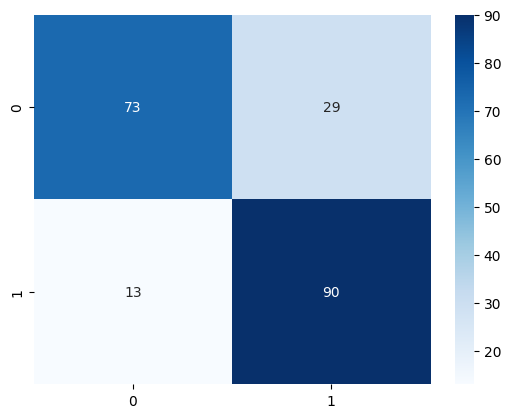

Performance measures for Fold Number:  1
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



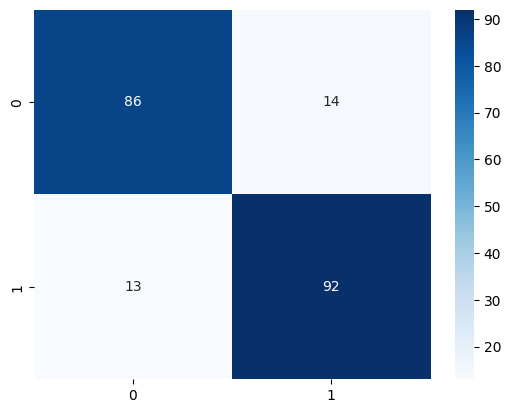

Performance measures for Fold Number:  2
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       100
           1       0.87      0.88      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



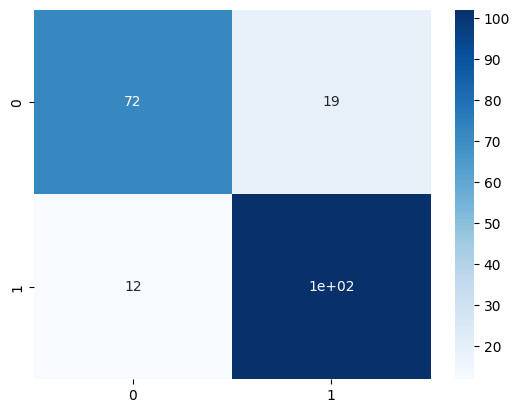

Performance measures for Fold Number:  3
              precision    recall  f1-score   support

           0       0.86      0.79      0.82        91
           1       0.84      0.89      0.87       114

    accuracy                           0.85       205
   macro avg       0.85      0.84      0.85       205
weighted avg       0.85      0.85      0.85       205



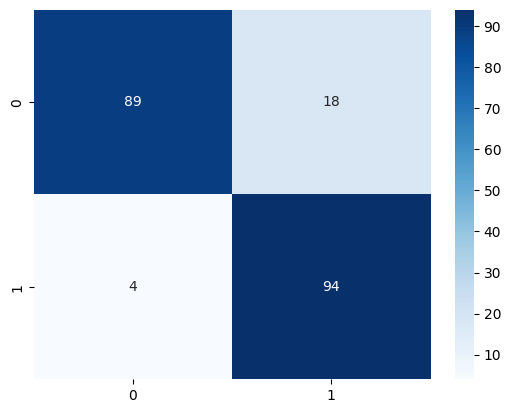

Performance measures for Fold Number:  4
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       107
           1       0.84      0.96      0.90        98

    accuracy                           0.89       205
   macro avg       0.90      0.90      0.89       205
weighted avg       0.90      0.89      0.89       205



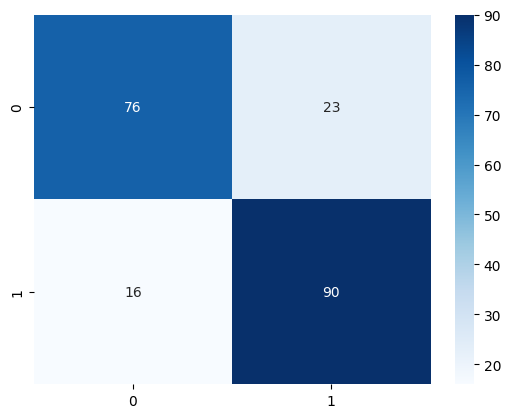

Performance measures for Fold Number:  5
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.80      0.85      0.82       106

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205

Accuracy (K-fold cross validation): 0.8429268292682928


In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
kf = KFold(n_splits=5, shuffle=True, random_state=42)
count =0
scores = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm= confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues')
    plt.show()
    scores.append(accuracy_score(y_test, y_pred))
    print("Performance measures for Fold Number: ", count+1)
    print(classification_report(y_test, y_pred))
    count = count + 1
print("Accuracy (K-fold cross validation):", np.mean(scores))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       100
           1       0.85      0.84      0.84       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



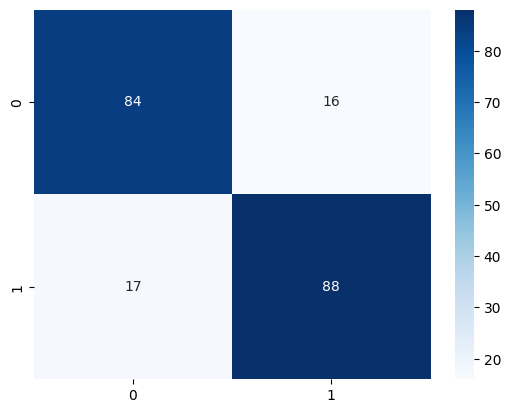

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       100
           1       0.84      0.91      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



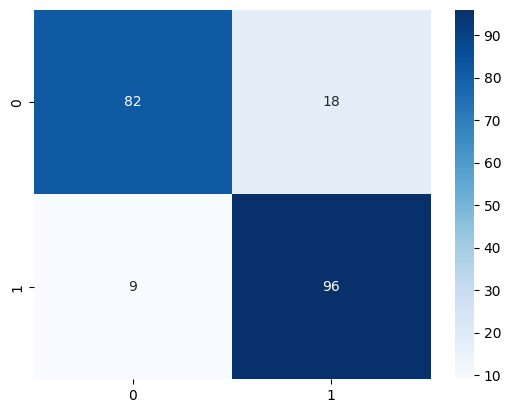

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.81      0.89      0.85       105

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



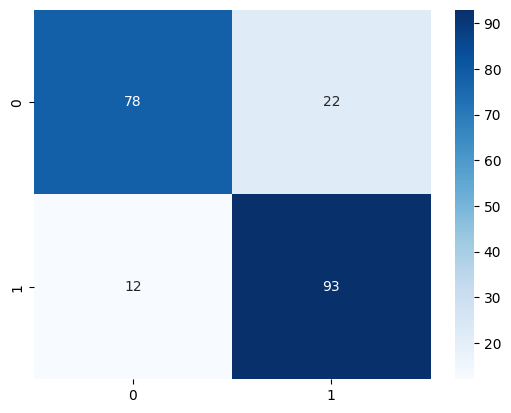

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       100
           1       0.79      0.94      0.86       105

    accuracy                           0.84       205
   macro avg       0.85      0.84      0.84       205
weighted avg       0.85      0.84      0.84       205



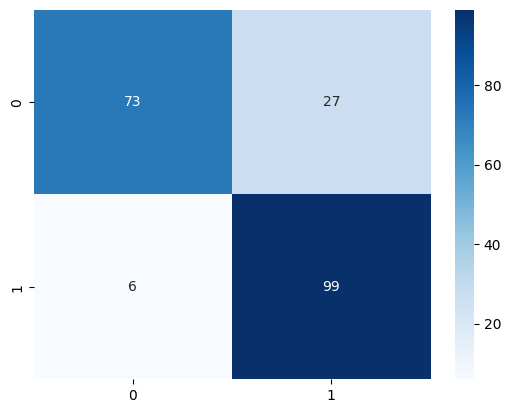

              precision    recall  f1-score   support

           0       0.91      0.79      0.84        99
           1       0.82      0.92      0.87       106

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



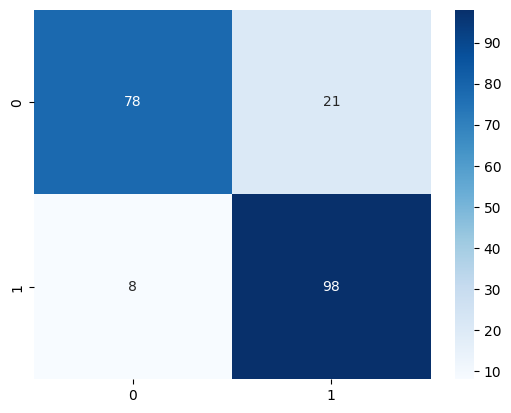

Accuracy (Stratified K-fold cross validation): 0.8478048780487806


In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_index, test_index in skf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm= confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True,cmap='Blues')
    scores.append(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    # plt.plot(acc)
    plt.show()
print("Accuracy (Stratified K-fold cross validation):", np.mean(scores))

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)


log_regression = LogisticRegression()

log_regression.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]


auc = metrics.roc_auc_score(y_test, y_pred_proba)

print(auc)

0.9344192934207742
